##### We will now fract Diff the non stationary features . 

# Imports and Functions

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
np.random.seed(0)

In [67]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
np.random.seed(0)
# Fractional differntiation code snippets from Dr. Ernie P Chan and Dr. Roger Hunter
def getWeights_FFD(d,thres):
    w,k=[1.],1
    while True:
        w_=-w[-1]/k*(d-k+1)
        if abs(w_)<thres:break
        w.append(w_);k+=1
    return np.array(w[::-1]).reshape(-1,1)

def fracDiff_FFD(series,d,thres=1e-5):
    # Constant width window (new solution)
    w=getWeights_FFD(d,thres)
    df={}
    for name in series.columns:
        df_=pd.Series(series[name].values,index=series.index).fillna(method='ffill').dropna()
        x=pd.Series(0,index=df_.index)
        for k in range(w.shape[0]):
            x=x+w[k,0]*df_.shift(-k)
    #df[name]=x.dropna().copy(deep=True)
    df[name]=x.shift(k).copy(deep=True)
    df=pd.concat(df,axis=1)
    return df   

def findMinD(series):
    for d in np.linspace(0,1,11):
        df_=fracDiff_FFD(series,d,thres=0.01).dropna()
        res=adfuller(df_.iloc[:,0].values,maxlag=1,regression='c',autolag=None)
        
        if (res[0]<=res[4]['5%']):
            return d
    return 1.0

In [68]:
uso = pd.read_csv('USO.csv')
uso.columns = ['Date', 'Open','High', 'Low', 'Close', 'UnAdjustedClose', 'Volume']

In [5]:
uso['log_close'] = np.log(uso['Close'])

# Question 1
Download the USO.csv  Download USO.csvfile which contains the daily bars of the US Oil (Exchange Traded) Fund. Use the provided functions getWeights_FFD, fractDiff.FFD, and findMinD, to find the minimum fractional dimension d that will turn this price series into a stationary series. (3 pt)

In [6]:
log_close = pd.DataFrame(uso['log_close'])
findMinD(log_close )

0.5

In [7]:
close = pd.DataFrame(uso['Close'])
findMinD(close )

0.4

# Question 2

Using the d you found in part 1 to fractionally differentiate the USO daily price series. Use adfuller from statsmodels.tsa.stattools to determine the ADF statistics of the resulting time series. Can you conclude from these statistics that the fractionally differentiated time series is stationary? (3 pt)

Answer: It's a strong indication that there the fractional diff at 0.4 created a stationary dataset with a < .01. Other tests would be needed to be completely sure but it's a strong liklihood



In [8]:
frac_dif_df = fracDiff_FFD(close, 0.4, 0.01)
frac_dif_df.dropna(how='any', inplace=True)
adfuller(frac_dif_df['Close'].values,maxlag=1,regression='c',autolag=None)

(-3.5341381935918106,
 0.007152436108903588,
 1,
 3296,
 {'1%': -3.4323355582984356,
  '5%': -2.8624173022673167,
  '10%': -2.5672370061423377})

In [9]:
adfuller(frac_dif_df['Close'].values,maxlag=1,regression='c',autolag=None)

(-3.5341381935918106,
 0.007152436108903588,
 1,
 3296,
 {'1%': -3.4323355582984356,
  '5%': -2.8624173022673167,
  '10%': -2.5672370061423377})

In [10]:
log_frac_dif_df = fracDiff_FFD(log_close, 0.5, 0.01)
log_frac_dif_df.dropna(how='any', inplace=True)
adfuller(log_frac_dif_df['log_close'].values,maxlag=1,regression='c',autolag=None)

(-3.7566886200194323,
 0.003382866098647261,
 1,
 3297,
 {'1%': -3.4323349555967604,
  '5%': -2.862417036057391,
  '10%': -2.5672368644181542})

# Question 3
Complete Exercise 5.1 in AFML using the functions that we provided. (Each part carries 1 pt. for a total of 3 pt)

Generate a time series from an IID Gaussian random process. This is a memory-less, stationary series:

- Compute the ADF statistic on this series. What is the p-value? 
  - Answer: p-value == 0
- Compute the cumulative sum of the observations. This is a non-stationary series without memory.
- What is the order of integration of this cumulative series?
  - Answer: d= 0.4
- Compute the ADF statistic on this series. What is the p-value?
  - Answer: p-value = 0.0003581977244318168
- Differentiate the series twice. What is the p-value of this over-differentiated series?
  - Answer: p-value  2.207889029216563e-30,

## Create random data

In [136]:
np.random.seed(0) 
rando = np.random.normal(0,1, 5000)

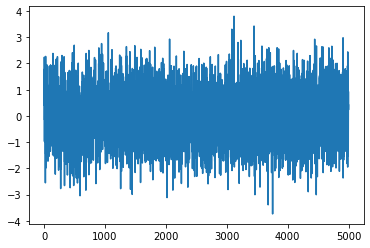

In [137]:
plt.plot(rando);

In [138]:
result = adfuller(rando)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -70.056013
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## CUMSUM

In [139]:
cumsum_rando = np.cumsum(rando)

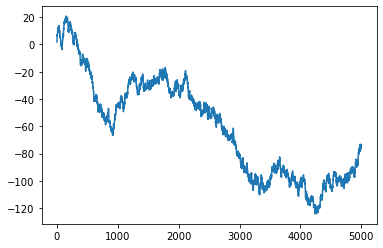

In [140]:
plt.plot(cumsum_rando);

In [141]:
result = adfuller(cumsum_rando)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.671806
p-value: 0.445694
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [142]:
# Find order of integration for first CUSUM
close = pd.DataFrame(pd.Series(cumsum_rando))
findMinD(close )

0.4

## Double Diff

(-3.4426587886502613,
 0.009587800935045798,
 30,
 3512,
 {'1%': -3.432213350242838,
  '5%': -2.8623633225589806,
  '10%': -2.567208268744065},
 9917.737502799224)

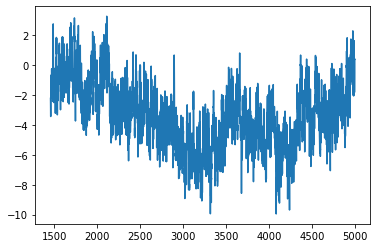

In [143]:
# Double ADF with plot
single_diff = fracDiff_FFD(close, 0.4)
single_diff.dropna(how='any', inplace=True)
plt.plot(single_diff);
adfuller(single_diff)

(-18.382697371655865,
 2.207889029216563e-30,
 3,
 2082,
 {'1%': -3.4334947554105537,
  '5%': -2.862929213668854,
  '10%': -2.567509552921939},
 5876.557133572742)

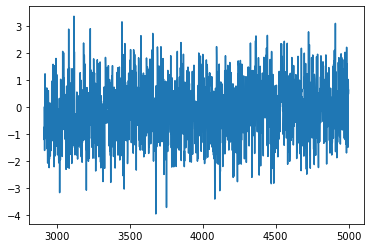

In [144]:
# Double ADF with plot
double_diff = fracDiff_FFD(single_diff, 0.4)
double_diff.dropna(how='any', inplace=True)
plt.plot(double_diff)
adfuller(double_diff)

# Question 4
Seems like the code in AFML will loop through until the end instead of stop. Can imagine it's a solid difference